# 10.3 RANDOM WALK WITH RANDOM WAITING TIMES

Use this notebook to store your work for this problem.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy.random import default_rng

rng = default_rng()
rand = rng.random

## (a)

Text(0.5, 1.0, 'x versus t Graphic')

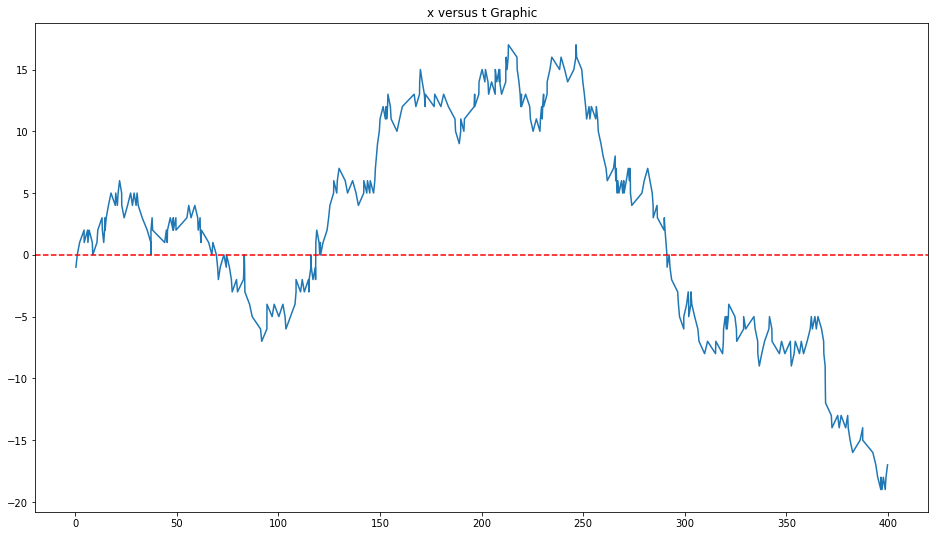

In [34]:
B = 1
rand_num = -((1/B) * np.log(rand(1000))).cumsum()
t = rand_num[(rand_num > 0) * (rand_num < 400)]

num_steps = len(t)
X_rand = 2*(rand(num_steps) < 0.5) - 1
X = X_rand.cumsum()

plt.figure(figsize = (16,9))
plt.plot(t,X)
plt.axhline(y = 0, color = 'r',linestyle = '--')
plt.title('x versus t Graphic')

## (b)

In [29]:
num_sim = 50
B = 1
end_t = [200,400,600] 
mean = np.zeros(3)
var = np.zeros(3)
endpoints = np.zeros(num_sim)
a = 0
for N in end_t:
    for i in range(num_sim):
        rand_num = -((1/B) * np.log(rand(2*N))).cumsum()
        time = rand_num[(rand_num > 0) * (rand_num < N)]

        num_steps = len(t)
        X_rand = 2*(rand(num_steps) < 0.5) - 1
        X = X_rand.cumsum()
        endpoints[i] = X[-1]
    mean[a] = endpoints.mean()
    var[a] = endpoints.var()
    a = a+1
    
print('mean---> ', mean)
print('variance---> ', var)

mean--->  [-1.08  0.32  2.96]
variance--->  [347.3936 268.3776 418.9184]


## (c)

## (d)

Text(0.5, 1.0, 'x versus y 2D Graphic')

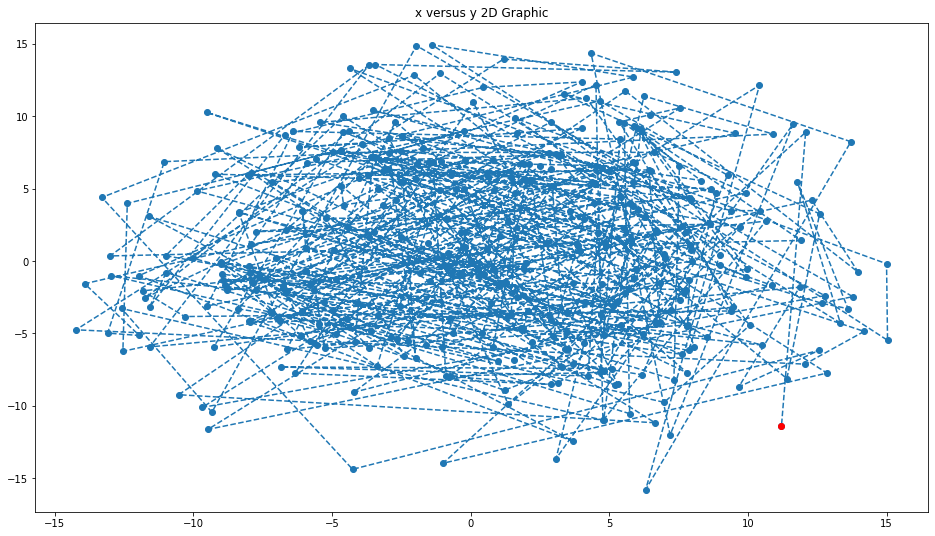

In [31]:
B = 1
rand_num = -((1/B) * np.log(rand(1000))).cumsum()
t = rand_num[(rand_num > 0) * (rand_num < 400)]

num_steps = len(t)
r_rand = 2*(rand(num_steps) < 0.5) - 1
r = r_rand.cumsum()

y_rand = np.random.uniform(0,2,num_steps)
angle = np.pi * y_rand
Y = r * np.sin(angle)
X = r * np.cos(angle)
plt.figure(figsize = (16,9))
plt.plot(X,Y,"--o")
plt.plot(X[-1],Y[-1],'or')
plt.title('x versus y 2D Graphic')

## (e)

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

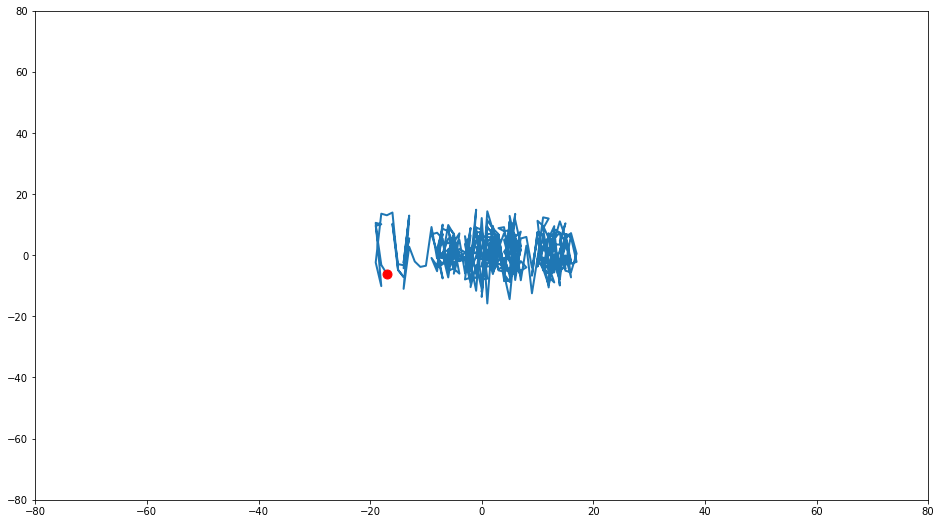

In [35]:
plt.close('all')
bound = 80
fig = plt.figure(figsize=(16,9))
ax = plt.axes(xlim=(-bound,bound),ylim=(-bound,bound))

line, = ax.plot([],[],lw=2)
point, = ax.plot([],[],'ro',ms=9)

def get_step(n,x,y,line2,point2):
    line2.set_data(x[:n+1],y[:n+1])
    point2.set_data(x[n],y[n])
    return line2, point2

anim = FuncAnimation(fig,get_step,frames=num_steps,fargs=(X,Y,line,point))
anim.save('random_walk.mp4',fps=30,dpi=300)
